# Problem Definition

This dataset was retrieved from Kaggle's public datasets and describes characteristics of members of a health insurance plan. We are performing a detailed exploratory data analysis (EDA) to make better sense of the data. EDA is the process of figuring out what the data can tell us and can be used to find patterns, relationships, or anomalies to inform our subsequent analysis. There are endless ways to perform EDA, and we will explore some of them using the seaborn visualization library. 

## Installing the Libraries

The first step is to install the necessary libraries for performing EDA. Numpy will be used for linear algebra, pandas for data processing and seaborn for data visualizations. Input data files are available in the "input" directory.

In [12]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("input"))
import matplotlib.pyplot as plt
import seaborn as sns

['insurance.csv']


## Importing the Dataset

The next step is to import the dataset and check its shape, i.e. the number of rows and columns. 

In [13]:
data = pd.read_csv('input/insurance.csv')
print(data.shape)

(1338, 7)


There are 7 columns or features, and 1338 rows or members. 

## Exploratory Data Analysis

Now we begin looking at the data in more detail. First, we will look at the different data types.  

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


We have integers, floats and objects, and luckily no null values. Next, we take a look at the summary statstics for the dataset. 


In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


It looks like everything is within acceptable ranges. For example, age is between 18 and 64, which makes sense given that this is a dataset of adults on a commercial insurance plan. Next, we check the head (top 5 rows) of the dataset.

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


No inconsistencies are identified. Lets move on to create a pairs plot. Pair plots are a great method to identify trends for follow-up analysis, and fortunately seaborn gives us an easy way to implement them.

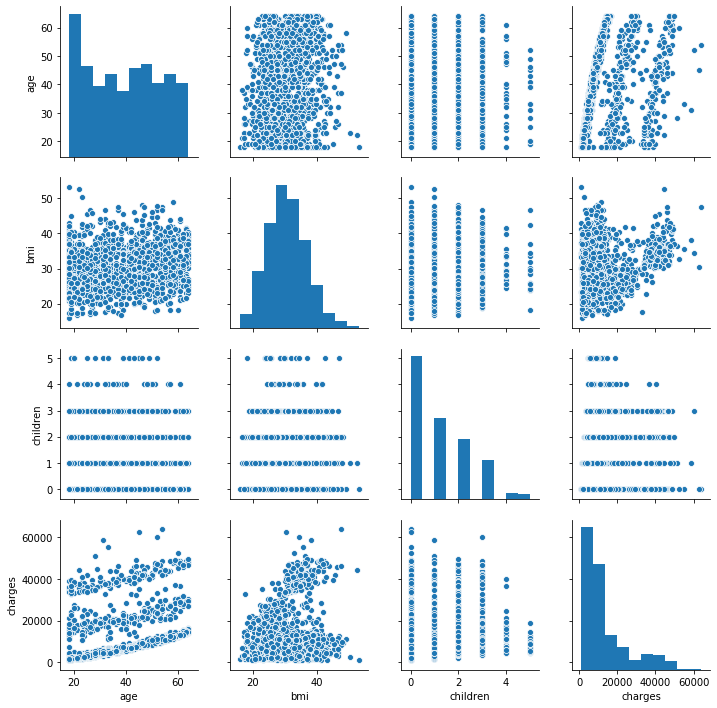

In [76]:
sns.pairplot(data=data)

Age seems to be an interesting feature. Let's visualize the ages of the members.

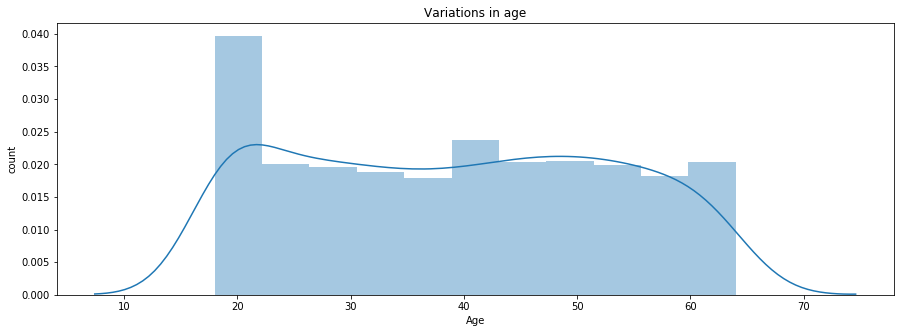

In [90]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['age'])
plt.title('Variations in age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

Lets also create a scatter plot to check the relationship between age and charges using a scatter plot as well as a barplot.

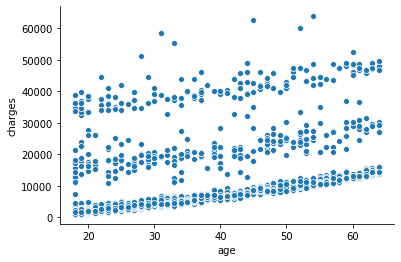

In [20]:
sns.scatterplot(x= data['age'] , y= data['charges'])
sns.despine()

Text(0.5, 1.0, 'Age vs Charges')

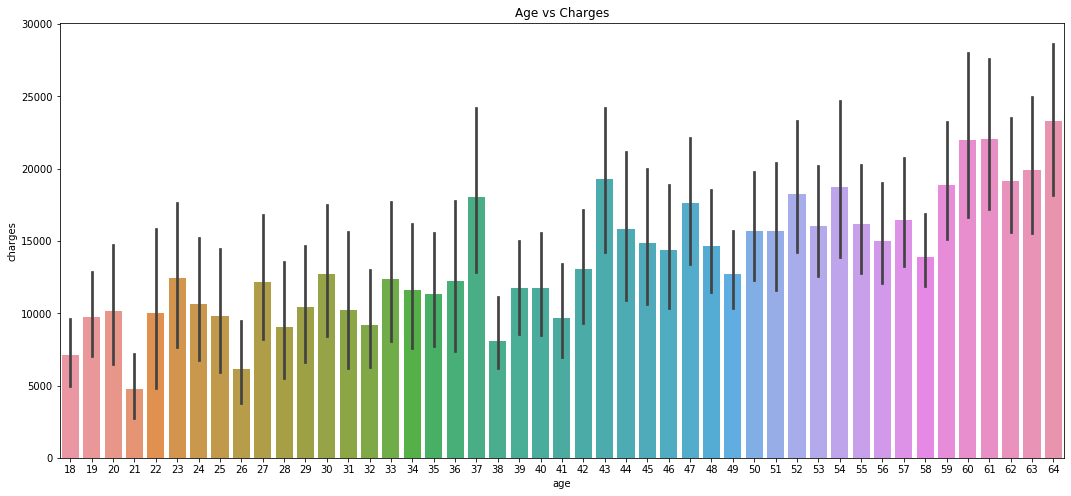

In [89]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

As expected, charges go up with age. We see from the scatterplot that there are 3 distinct cohorts of members that can be described as low-cost, medium-cost and high-cost members. We can also see from the barplot that at certain ages, the charges spike, like at age 22 and 27. We might hypothesize that at 22 many people get their first job and consequently their first insurance plan, and at 27 those who remained on their parents plan were forced to buy their own, since the ACA allows children to be on parents plans until age 26. 

It might be interesting to look at the relationship between a member's number of children and charges. First let's look at the distribution of the number of children.


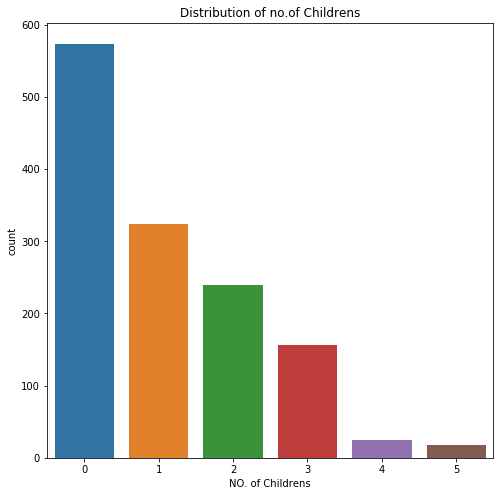

In [26]:
sns.countplot(data['children'])
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'children vs charges')

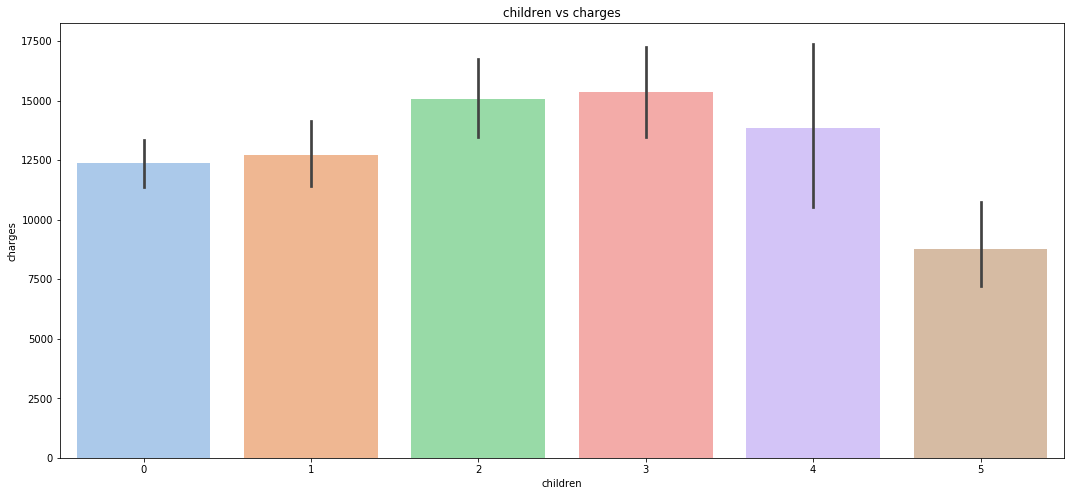

In [88]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'children', y = 'charges', data = data, palette ='pastel')

plt.title('children vs charges')

The number of children a member has an interesting impact on charges based on this plot: those with 2 or 3 kids have slightly higher charges than those with 0-1 or 4-5 kids. Lets take a look at gender. 

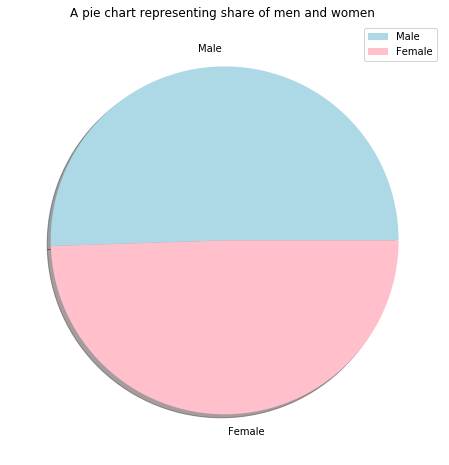

In [77]:
size = [676, 662]
colors = ['lightblue', 'pink']
labels = "Male", "Female"

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True)
plt.title('A pie chart representing share of men and women ')
plt.legend()
plt.show()

There are about the same number of males and females in this dataset. Lets see how gender affects charges using a violin plot.

Text(0.5, 1.0, 'Sex vs charges')

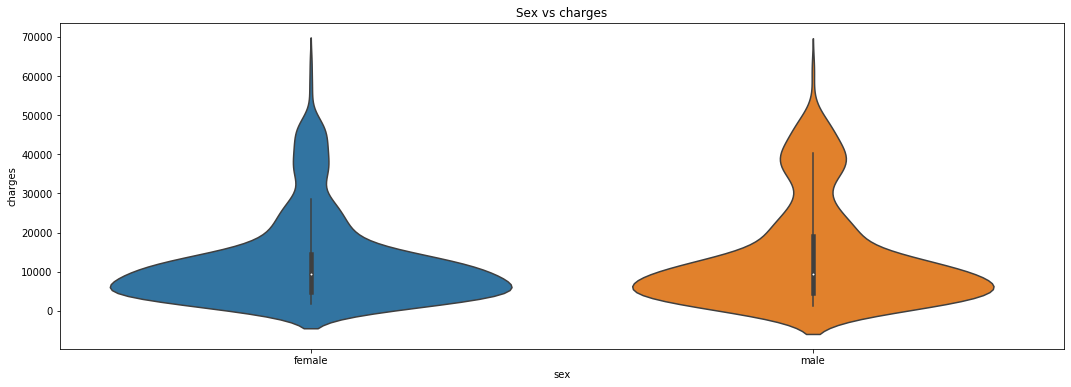

In [87]:
plt.figure(figsize = (18, 6))
sns.violinplot(x = 'sex', y = 'charges', data = data)
plt.title('Sex vs charges')

From the upper end of the violin plot we see that in general, males have a greater number of high cost charges than females. It would be interesting to see how these charges depend on age as well.

Text(0.5, 1.0, 'Charges vs Age filtered by sex')

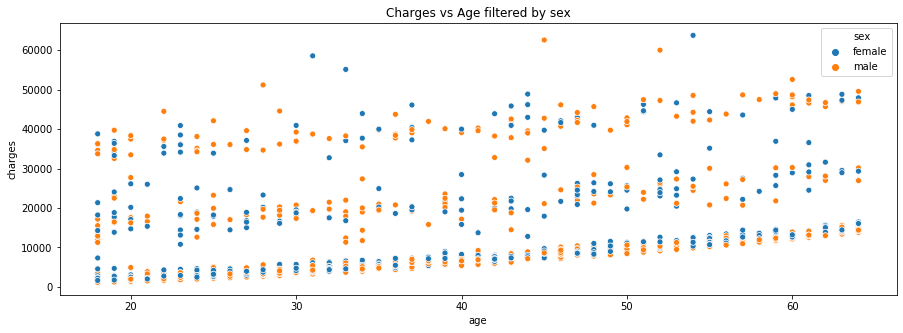

In [97]:
sns.scatterplot(x= data['age'] , y= data['charges'], hue='sex', data=data).set_title('Charges vs Age filtered by sex')


While it is difficult to see any significant relationship here, we can perform a similar analysis but this time filtering for smoking status. First lets see how many members smoke.

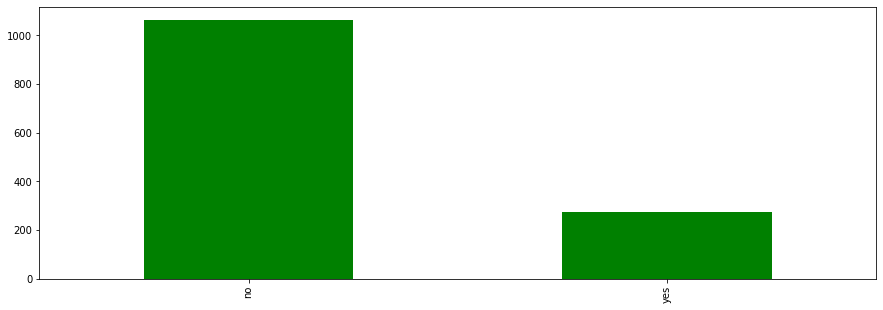

In [96]:
data['smoker'].value_counts().plot.bar(color = 'green')

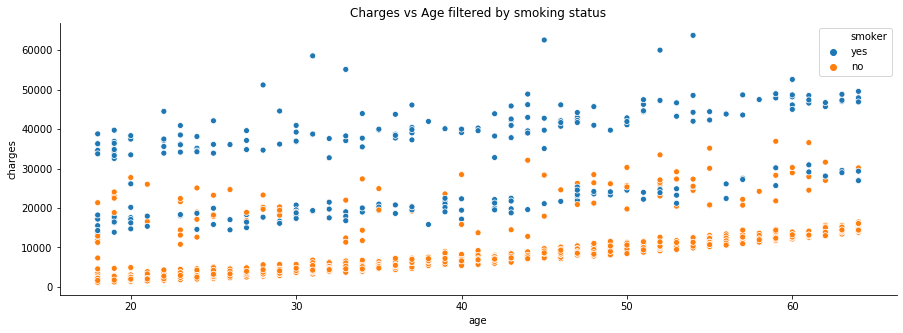

In [95]:
sns.scatterplot(x= data['age'] , y= data['charges'], hue='smoker', data=data).set_title('Charges vs Age filtered by smoking status')
sns.despine()

Surprising? Maybe not...smokers consistently seem to have higher charges on average than non-smokers, independent of age. Let's see how BMI plays into this. 

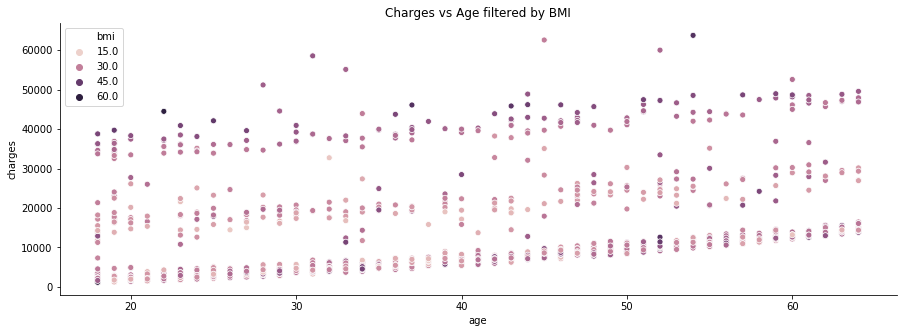

In [94]:
sns.scatterplot(x= data['age'] , y= data['charges'], hue='bmi', data=data).set_title('Charges vs Age filtered by BMI')
sns.despine()

Members with higher BMIs, on average experience higher charges, again independent of age. We are curious about the impact of having a high BMI AND smoking. First, let's define a new variable: "high_BMI_smoker". We will define "high BMI" to be >= 30.


In [83]:
data['bmi_smoker'] = 'default value'
data.loc[(data.bmi >= 30) & (data.smoker == 'yes'), 'bmi_smoker'] = 'high_BMI_smoker'
data.loc[(data.bmi >= 30) & (data.smoker == 'no'), 'bmi_smoker'] = 'high_BMI_no_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'yes'), 'bmi_smoker'] = 'other_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'no'), 'bmi_smoker'] = 'other_no_smoker'
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,other_smoker
1,18,male,33.770,1,no,southeast,1725.55230,high_BMI_no_smoker
2,28,male,33.000,3,no,southeast,4449.46200,high_BMI_no_smoker
3,33,male,22.705,0,no,northwest,21984.47061,other_no_smoker
4,32,male,28.880,0,no,northwest,3866.85520,other_no_smoker


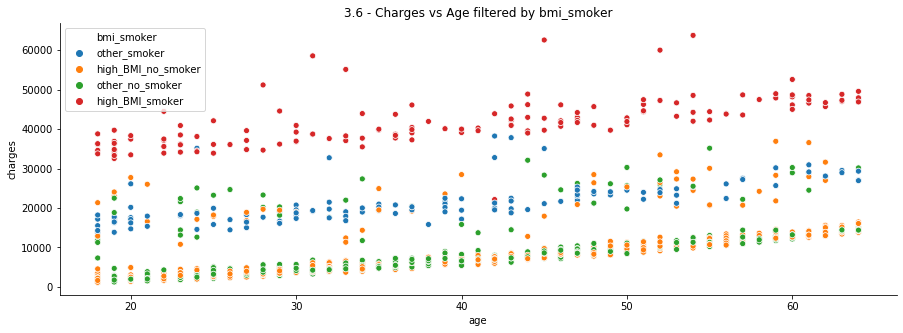

In [93]:
sns.scatterplot(x= data['age'] , y= data['charges'], hue='bmi_smoker', data=data).set_title('3.6 - Charges vs Age filtered by bmi_smoker')
sns.despine()

Clearly, being a smoker and having a high BMI is highly correlated with having high charges. Next we can visualize the regions to which members belong.

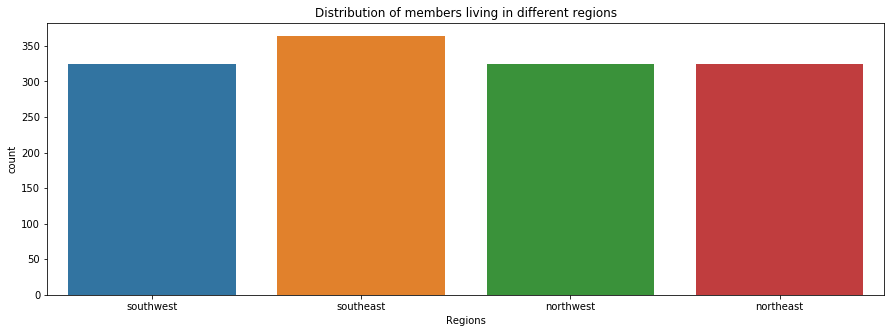

In [92]:
sns.countplot( data['region'])
plt.title('Distribution of members living in different regions')
plt.xlabel('Regions')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, 'region vs charges')

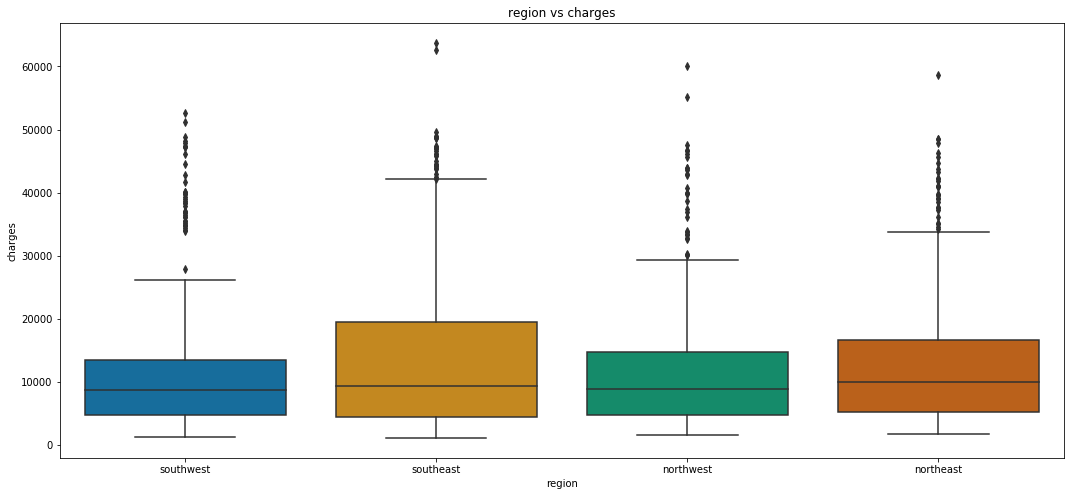

In [18]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'region', y = 'charges', data = data, palette = 'colorblind')
plt.title('region vs charges')

From this plot we can see that region really does not play a large role in charges. Finally, we will display the correlation plot for the dataset.

## Correlation Plot

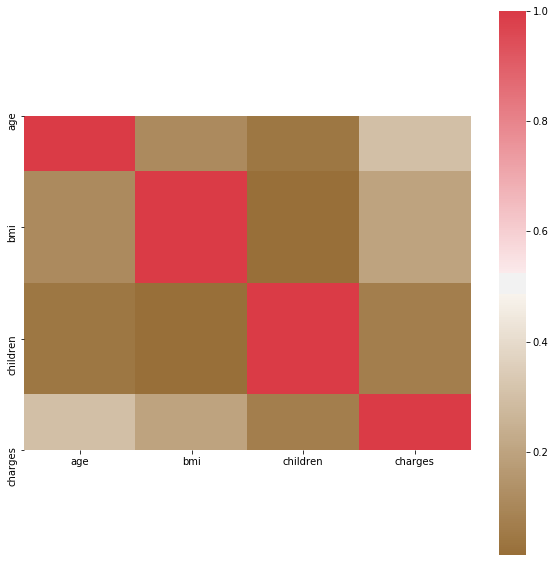

In [98]:
f, ax = plt.subplots(figsize = (10, 10))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

In conclusion, based on our EDA and reiterated through our final correlation plot, it appears that age is the most correlated with charges among these variables. It is followed by BMI, and then the number of children. We also know that a member who has a high BMI and also smokes is at increased risk for high charges. 